In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df=df.dropna()

In [4]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [6]:
df.corr()

,T,TM,Tm,SLP,H,W,V,VM,PM2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
W,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


### decision Tree Regressor

### Train Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
dtree=DecisionTreeRegressor(criterion='mse')

In [11]:
dtree.fit(X_train,y_train) # training the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
print('coefficient of determination of R^2 ON TRAIN SET : {}'.format(dtree.score(X_train,y_train)))
print('coefficient of determination of R^2 ON TEST SET : {}'.format(dtree.score(X_test,y_test)))

coefficient of determination of R^2 ON TRAIN SET : 1.0
coefficient of determination of R^2 ON TEST SET : 0.270096598374845


#### the above is the case of overfitting

In [15]:
from sklearn.model_selection import cross_val_score;
score=cross_val_score(dtree,X,y,cv=5)
print('scores are', score)
print('mean score value is ', score.mean())

scores are [ 0.25123685 -0.09027324 -0.08297349  0.52272253  0.1782856 ]
mean score value is  0.15579964746219654


### model evaluation

In [16]:
prediction=dtree.predict(X_test)

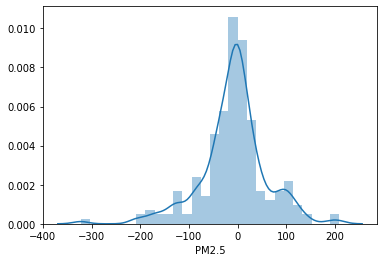

In [17]:
sns.distplot(y_test-prediction)

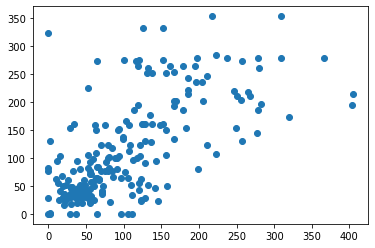

In [19]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [20]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
random_search=GridSearchCV(dtree,params,scoring='neg_mean_squared_error',cv=10,n_jobs=-1,verbose=3)

In [25]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2188 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 7308 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 14476 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 23692 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 34956 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 48268 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 63628 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 81036 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100492 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  3.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                

In [26]:
random_search.best_params_

{'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [28]:
random_search.best_score_


-3149.6184377766995

In [29]:
predictions=random_search.predict(X_test)

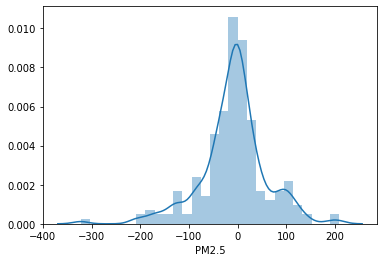

In [30]:
sns.distplot(y_test-prediction)

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 43.2889294631372
MSE: 3663.519088551588
RMSE: 60.527011230950336


## Regression Evaluation Metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 47.41284246575342
MSE: 4764.921693223618
RMSE: 69.02841221717053


In [35]:
import pickle 

In [36]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)